In [82]:
import numpy as np
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [56]:
# Release3
dir_Release3 = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_scripts/subjects_file_v4.json'
with open(dir_Release3) as f:
    subjects_R3 = json.load(f)

subjects_R3 = list(subjects_R3.keys())

#Release1

dir_Release1 = "/neurospin/dico/data/bv_databases/dHCP/neurospin/grip/external_databases/dHCP_CR_JD_2018/release1/subjects/dHCP_release1"
subjects_Release1 = os.listdir(dir_Release1)
subjects_R1 = [file[4:15] for file in subjects_Release1]

count=0
for file in subjects_R3:
    if file in subjects_R1:
        count+=1
        print(file)
print(count)

CC00117XX10
CC00122XX07
CC00126XX11
CC00138XX15
CC00162XX06
CC00164XX08
CC00168XX12
CC00201XX03
CC00205XX07
CC00206XX08
CC00209XX11
CC00250XX03
CC00268XX13
CC00303XX06
CC00313XX08
CC00347XX18
CC00357XX11
CC00363XX09
CC00367XX13
CC00415XX11
CC00418BN14
CC00421AN09
CC00421BN09
23


In [69]:
dict_sessions.values()

dict_values([{'session_id': 18600, 'session_dir': '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_anat_pipeline/sub-CC00065XX08/ses-18600', 't1mri': '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho_bids/sub-CC00065XX08/ses-18600/anat/t1mri/default_acquisition/CC00065XX08.nii.gz', 'has_pial': False}, {'session_id': 20200, 'session_dir': '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_anat_pipeline/sub-CC00067XX10/ses-20200', 't1mri': '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho_bids/sub-CC00067XX10/ses-20200/anat/t1mri/default_acquisition/CC00067XX10.nii.gz', 'has_pial': True}, {'session_id': 20701, 'session_dir': '/neurospin/grip/external_databases/dHCP_CR_JD_2018/release3/dhcp_anat_pipeline/sub-CC00068XX11/ses-20701', 't1mri': '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho_bids/sub-CC00068XX11/ses-20701/anat/t1mri/default_acquisition/CC00068XX

In [70]:
# get the session ids of R3
dir_sessions = '/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_scripts/subjects_file_v4.json'
with open(dir_sessions) as f:
    dict_sessions = json.load(f)
sessions = [value['session_id'] for _, value in dict_sessions.items()]

In [78]:
# get birth age list
dir_info_dHCP = '/home/jl274628/Documents/info_dHCP.tsv'
info_dHCP = pd.read_csv(dir_info_dHCP, usecols=['participant_id','birth_age', 'session_id'], sep='\t')
# filter over subjects
info_dHCP.drop(info_dHCP[~(info_dHCP['participant_id'].isin(subjects_R3))].index, inplace = True)
#info_dHCP.drop(info_dHCP[(info_dHCP['scan_number']!=1)].index, inplace = True) # not always scan 1
# filter over sessions
info_dHCP.drop(info_dHCP[~(info_dHCP['session_id'].isin(sessions))].index, inplace = True)

names = info_dHCP['participant_id'].tolist()
birth_age = info_dHCP['birth_age'].tolist()
birth_age = np.array(birth_age)
preterm = birth_age < 30
fullterm = birth_age > 37

In [79]:
info_dHCP.shape

(374, 3)

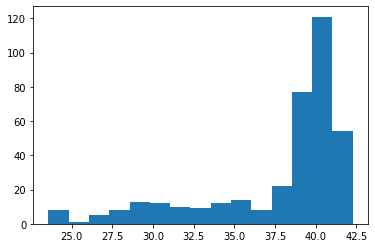

In [86]:
plt.hist(birth_age, bins=15)
plt.show()

In [87]:
preterm = preterm.astype(int)

df = pd.DataFrame({'Subject': names,
                   'Preterm': preterm})

In [89]:
df.to_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/crops/2mm/S.T.s.baby/mask/preterm_labels.csv', sep=',', index=False)

In [ ]:
## save all su